In [1]:
#! pip install sqlite3
import sqlite3


In [2]:
con_sqlt = sqlite3.connect(r"Users/aurelio.sosa.netmind/Pandas/database.db")
dfdb = pd.read_sql_query("SELECT*FROM movies", con_sqlt)
con_sqlt.close()

dfdb


OperationalError: unable to open database file

In [ ]:
import sqlite3
import pandas as pd
import os

# Obtener la ruta absoluta de la base de datos
db_path = os.path.abspath(r"Users/aurelio.sosa.netmind/Pandas/database.db")
print(db_path)

# Intentar la conexión
try:
    con_sqlt = sqlite3.connect(db_path)
    dfdb = pd.read_sql_query("SELECT * FROM movies", con_sqlt)
    con_sqlt.close()
    print(dfdb.head())  # Muestra las primeras filas si la conexión es exitosa
except sqlite3.OperationalError as e:
    print("Error al conectar a la base de datos:", e)

In [ ]:
import sqlite3
import os
import pandas as pd

# Ruta absoluta del archivo de base de datos
db_path = os.path.abspath(r"Users/aurelio.sosa.netmind/Pandas/database.db")

# Intentar la conexión a la base de datos
try:
    con_sqlt = sqlite3.connect(db_path)
    print("Conexión exitosa")
    con_sqlt.close()
except sqlite3.OperationalError as e:
    print("Error al conectar a la base de datos:", e)

if not os.path.exists(db_path):
    print("El archivo de base de datos no existe en la ruta especificada.")
else:
    print("El archivo de base de datos existe.")



In [ ]:
con_sqlt = sqlite3.connect("database.db")  # Archivo en la misma carpeta
cursor = con_sqlt.cursor()

# Crear una tabla de prueba
cursor.execute("CREATE TABLE IF NOT EXISTS test (id INTEGER, name TEXT)")
con_sqlt.commit()

print("Base de datos creada exitosamente")
con_sqlt.close()


In [ ]:
import os

# Mostrar la ruta actual del script
print("Directorio actual:", os.getcwd())

# Listar archivos y carpetas en la ubicación actual
print("Archivos en la carpeta actual:", os.listdir())

# Verificar si la base de datos está en la carpeta
db_path = "Users/aurelio.sosa.netmind/Pandas/database.db"
if os.path.exists(db_path):
    print("El archivo de base de datos existe.")
else:
    print("El archivo de base de datos NO existe.")


In [1]:
import sqlite3
import pandas as pd

# Ruta absoluta detectada
db_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/database.db"

# Intentar la conexión con la ruta absoluta
try:
    with sqlite3.connect(db_path) as con_sqlt:
        dfdb = pd.read_sql_query("SELECT * FROM movies", con_sqlt)
    print(dfdb.head()) # Mostrar las primeras filas de la tabla
except Exception as e:
    print("Error al conectar a la base de datos:", e)


                                title  movieId  \
0                    Toy Story (1995)        1   
1                      Jumanji (1995)        2   
2             Grumpier Old Men (1995)        3   
3            Waiting to Exhale (1995)        4   
4  Father of the Bride Part II (1995)        5   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
df_comedy = dfdb.loc[dfdb['genres'].str.contains('Comedy', case=False)]
print(df_comedy)

df_old_movies = dfdb.loc[dfdb['title'].str.contains('Old', case=False)]
print(df_old_movies)

df_filtered = dfdb.loc[dfdb['movieId'] > 10, ['title', 'genres']]
print(df_filtered)

first_movie = dfdb.iloc[0]
print(first_movie)

top_10_movies = dfdb.iloc[:10]
print(top_10_movies)

odd_rows = dfdb.iloc[1::2]
print(odd_rows)

df_selected_ids = dfdb[dfdb['movieId'].isin([1, 3, 5])]
print(df_selected_ids)

df_comedy_drama = dfdb[dfdb['genres'].isin(['Comedy', 'Drama'])]
print(df_comedy_drama)






                                          title  movieId  \
0                              Toy Story (1995)        1   
2                       Grumpier Old Men (1995)        3   
3                      Waiting to Exhale (1995)        4   
4            Father of the Bride Part II (1995)        5   
6                                Sabrina (1995)        7   
...                                         ...      ...   
9732                  Gintama: The Movie (2010)   193565   
9734                        Silver Spoon (2014)   193571   
9737  Black Butler: Book of the Atlantic (2017)   193581   
9738               No Game No Life: Zero (2017)   193583   
9741        Andrew Dice Clay: Dice Rules (1991)   193609   

                                           genres    year  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   
2                                  Comedy|Romance  1995.0   
3                            Comedy|Drama|Romance  1995.0   
4                                  

In [ ]:
drama_count = dfdb[dfdb['genres'].str.contains('Drama')].shape[0]
print(f"Total de películas de drama: {drama_count}")

dfdb['year'] = dfdb['title'].str.extract(r'\((\d{4})\)').astype(float)
print(dfdb.head())

df_before_2000 = dfdb[dfdb['year'] < 2000]
print(df_before_2000)

df_sorted = dfdb.sort_values(by='movieId', ascending=False)
print(df_sorted)

dfdb['genre_list'] = dfdb['genres'].str.split('|')
df_multiple_genres = dfdb[dfdb['genre_list'].apply(len) > 1]
print(df_multiple_genres)


Total de películas de drama: 4361
                                title  movieId  \
0                    Toy Story (1995)        1   
1                      Jumanji (1995)        2   
2             Grumpier Old Men (1995)        3   
3            Waiting to Exhale (1995)        4   
4  Father of the Bride Part II (1995)        5   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0  
                                    title  movieId  \
0                        Toy Story (1995)        1   
1                          Jumanji (1995)        2   
2                 Grumpier Old Men (1995)        3   
3                Waiting to Exhale (1995)        4   
4      Father of the Bride Part II (1995)        5   

In [15]:
from collections import Counter
all_genres = dfdb['genres'].str.split('|').sum()
genre_counts = Counter(all_genres)
print(genre_counts)

df_unique_movies = dfdb.drop_duplicates(subset=['title'])
print(df_unique_movies)


Counter({'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34})
                                          title  movieId  \
0                              Toy Story (1995)        1   
1                                Jumanji (1995)        2   
2                       Grumpier Old Men (1995)        3   
3                      Waiting to Exhale (1995)        4   
4            Father of the Bride Part II (1995)        5   
...                                         ...      ...   
9737  Black Butler: Book of the Atlantic (2017)   193581   
9738               No Game No Life: Zero (2017)   193583   
9739                               Flint (2017)   193585   
9740        Bungo Stray Dogs: Dead Apple (2018)   193587 

In [ ]:
dfdb['genre_list'] = dfdb['genres'].str.split('|')
df_multiple_genres = dfdb[dfdb['genre_list'].apply(len) > 1]
print(df_multiple_genres)


                                                  title  movieId  \
0                                      Toy Story (1995)        1   
1                                        Jumanji (1995)        2   
2                               Grumpier Old Men (1995)        3   
3                              Waiting to Exhale (1995)        4   
5                                           Heat (1995)        6   
...                                                 ...      ...   
9733  anohana: The Flower We Saw That Day - The Movi...   193567   
9734                                Silver Spoon (2014)   193571   
9737          Black Butler: Book of the Atlantic (2017)   193581   
9738                       No Game No Life: Zero (2017)   193583   
9740                Bungo Stray Dogs: Dead Apple (2018)   193587   

                                           genres    year  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   
1                      Adventure|Children|Fantasy  1995.0   


In [ ]:
print(dfdb.info())  # Muestra la estructura del DataFrame
print(dfdb.describe())  # Estadísticas de columnas numéricas
print(dfdb.isnull().sum())  # Detectar valores nulos por columna

dfdb = dfdb.drop_duplicates(subset=['title'])
print(dfdb.shape)

dfdb['genres'].fillna('Unknown', inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       9742 non-null   object 
 1   movieId     9742 non-null   int64  
 2   genres      9742 non-null   object 
 3   year        9729 non-null   float64
 4   genre_list  9742 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 380.7+ KB
None
             movieId         year
count    9742.000000  9729.000000
mean    42200.353623  1994.613629
std     52160.494854    18.535219
min         1.000000  1902.000000
25%      3248.250000  1988.000000
50%      7300.000000  1999.000000
75%     76232.000000  2008.000000
max    193609.000000  2018.000000
title          0
movieId        0
genres         0
year          13
genre_list     0
dtype: int64
(9737, 5)


/tmp/ipykernel_49827/2884212200.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfdb['genres'].fillna('Unknown', inplace=True)


In [18]:
dfdb['genres'].fillna('Unknown', inplace=True)


/tmp/ipykernel_49827/4256733401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfdb['genres'].fillna('Unknown', inplace=True)


In [19]:
dfdb.dropna(subset=['title', 'genres'], inplace=True)


In [ ]:
dfdb['year'] = dfdb['title'].str.extract(r'\((\d{4})\)').astype(float)
df_recent_movies = dfdb[dfdb['year'] > 2000]
print(df_recent_movies.head())

df_action_movies = dfdb[dfdb['genres'].str.contains('Action', case=False)]
print(df_action_movies)

df_long_movies = dfdb[dfdb['duration'] > 120]
print(df_long_movies)


                           title  movieId                        genres  \
3028            Antitrust (2001)     4052          Crime|Drama|Thriller   
3029          Double Take (2001)     4053                 Action|Comedy   
3030  Save the Last Dance (2001)     4054                 Drama|Romance   
3032          Pledge, The (2001)     4056  Crime|Drama|Mystery|Thriller   
3040        Sugar & Spice (2001)     4068                        Comedy   

        year                         genre_list  
3028  2001.0           [Crime, Drama, Thriller]  
3029  2001.0                   [Action, Comedy]  
3030  2001.0                   [Drama, Romance]  
3032  2001.0  [Crime, Drama, Mystery, Thriller]  
3040  2001.0                           [Comedy]  
                                          title  movieId  \
5                                   Heat (1995)        6   
8                           Sudden Death (1995)        9   
9                              GoldenEye (1995)       10   
14       

KeyError: 'duration'

In [ ]:
df_long_movies = dfdb[dfdb['duration'] > 120]
print(df_long_movies)


KeyError: 'duration'

In [22]:
print("Columnas disponibles en dfdb:", dfdb.columns.tolist())


Columnas disponibles en dfdb: ['title', 'movieId', 'genres', 'year', 'genre_list']


In [23]:
genre_counts = dfdb['genres'].value_counts()
print(genre_counts)

df_avg_duration = dfdb.groupby('genres')['duration'].mean()
print(df_avg_duration)


genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           348
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64


KeyError: 'Column not found: duration'

In [24]:
dfdb['decade'] = (dfdb['year'] // 10) * 10
movies_by_decade = dfdb.groupby('decade').size()
print(movies_by_decade)

df_sorted = dfdb.sort_values(by='title', ascending=True)
print(df_sorted)

df_sorted_by_year = dfdb.sort_values(by='year', ascending=False)
print(df_sorted_by_year)


decade
1900.0       3
1910.0       7
1920.0      37
1930.0     136
1940.0     197
1950.0     279
1960.0     401
1970.0     500
1980.0    1176
1990.0    2211
2000.0    2846
2010.0    1931
dtype: int64
                                          title  movieId  \
8600                                 '71 (2014)   117867   
8014    'Hellboy': The Seeds of Creation (2004)    97757   
5528                     'Round Midnight (1986)    26564   
5690                        'Salem's Lot (2004)    27751   
614                   'Til There Was You (1997)      779   
...                                         ...      ...   
1961                            eXistenZ (1999)     2600   
3920                                 xXx (2002)     5507   
5882             xXx: State of the Union (2005)    33158   
1866                      ¡Three Amigos! (1986)     2478   
3947  À nous la liberté (Freedom for Us) (1931)     5560   

                                           genres    year  \
8600              

In [25]:
df_sorted_by_year = dfdb.sort_values(by='year', ascending=False)
print(df_sorted_by_year)

df_oldest_movies = dfdb.nsmallest(10, 'year')
print(df_oldest_movies)


                                  title  movieId  \
9681                  Game Night (2018)   183611   
9697           A Wrinkle in Time (2018)   184987   
9711   Won't You Be My Neighbor? (2018)   187717   
9710     Solo: A Star Wars Story (2018)   187595   
9709                  Deadpool 2 (2018)   187593   
...                                 ...      ...   
9514                             Cosmos   171495   
9515            Maria Bamford: Old Baby   171631   
9518  Death Note: Desu nôto (2006–2007)   171749   
9525                  Generation Iron 2   171891   
9611                       Black Mirror   176601   

                                 genres    year  \
9681         Action|Comedy|Crime|Horror  2018.0   
9697  Adventure|Children|Fantasy|Sci-Fi  2018.0   
9711                        Documentary  2018.0   
9710   Action|Adventure|Children|Sci-Fi  2018.0   
9709               Action|Comedy|Sci-Fi  2018.0   
...                                 ...     ...   
9514              

In [26]:
df_oldest_movies = dfdb.nsmallest(10, 'year')
print(df_oldest_movies)


                                                  title  movieId  \
5868  Trip to the Moon, A (Voyage dans la lune, Le) ...    32898   
6355                     The Great Train Robbery (1903)    49389   
9020                          The Electric Hotel (1908)   140541   
4743                      Birth of a Nation, The (1915)     7065   
4846  Intolerance: Love's Struggle Throughout the Ag...     7243   
6863                20,000 Leagues Under the Sea (1916)    62383   
7210                                  Snow White (1916)    72921   
8170                                   Rink, The (1916)   102747   
5217                              Immigrant, The (1917)     8511   
2363                             Daddy Long Legs (1919)     3132   

                               genres    year  \
5868  Action|Adventure|Fantasy|Sci-Fi  1902.0   
6355                    Crime|Western  1903.0   
9020          Animation|Comedy|Sci-Fi  1908.0   
4743                        Drama|War  1915.0   
4846  

In [27]:
import sqlite3
import pandas as pd

# Ruta absoluta detectada
db_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/database.db"

# Intentar la conexión con la ruta absoluta
try:
    with sqlite3.connect(db_path) as con_sqlt:
        dfdb = pd.read_sql_query("SELECT * FROM movies", con_sqlt)
        df_ratings = pd.read_sql_query("SELECT * FROM ratings", con_sqlt)
        df_combined = pd.merge(dfdb, df_ratings, on='movieId', how='inner')
    print(dfdb.head()) # Mostrar las primeras filas de la tabla
except Exception as e:
    print("Error al conectar a la base de datos:", e)
    print(df_combined.head())



Error al conectar a la base de datos: Execution failed on sql 'SELECT * FROM ratings': no such table: ratings


NameError: name 'df_combined' is not defined

In [28]:
df_ratings = pd.read_sql_query("SELECT * FROM ratings", conn)
df_combined = pd.merge(dfdb, df_ratings, on='movieId', how='inner')
print(df_combined.head())





NameError: name 'conn' is not defined

In [29]:
df_combined_left = pd.merge(dfdb, df_ratings, on='movieId', how='left')
print(df_combined_left.head())


NameError: name 'df_ratings' is not defined

In [30]:
dfdb['year'] = dfdb['title'].str.extract(r'\((\d{4})\)')
dfdb['year'] = dfdb['year'].astype(float)




In [31]:
dfdb['is_recent'] = dfdb['year'] > 2010
print(dfdb[['title', 'is_recent']])

                                          title  is_recent
0                              Toy Story (1995)      False
1                                Jumanji (1995)      False
2                       Grumpier Old Men (1995)      False
3                      Waiting to Exhale (1995)      False
4            Father of the Bride Part II (1995)      False
...                                         ...        ...
9737  Black Butler: Book of the Atlantic (2017)       True
9738               No Game No Life: Zero (2017)       True
9739                               Flint (2017)       True
9740        Bungo Stray Dogs: Dead Apple (2018)       True
9741        Andrew Dice Clay: Dice Rules (1991)      False

[9742 rows x 2 columns]


In [32]:
def categorize_year(year):
    if year >= 2000:
        return 'Moderna'
    elif year >= 1980:
        return 'Clásica'
    else:
        return 'Antigua'

dfdb['category'] = dfdb['year'].apply(categorize_year)
print(dfdb[['title', 'category']])


                                          title category
0                              Toy Story (1995)  Clásica
1                                Jumanji (1995)  Clásica
2                       Grumpier Old Men (1995)  Clásica
3                      Waiting to Exhale (1995)  Clásica
4            Father of the Bride Part II (1995)  Clásica
...                                         ...      ...
9737  Black Butler: Book of the Atlantic (2017)  Moderna
9738               No Game No Life: Zero (2017)  Moderna
9739                               Flint (2017)  Moderna
9740        Bungo Stray Dogs: Dead Apple (2018)  Moderna
9741        Andrew Dice Clay: Dice Rules (1991)  Clásica

[9742 rows x 2 columns]


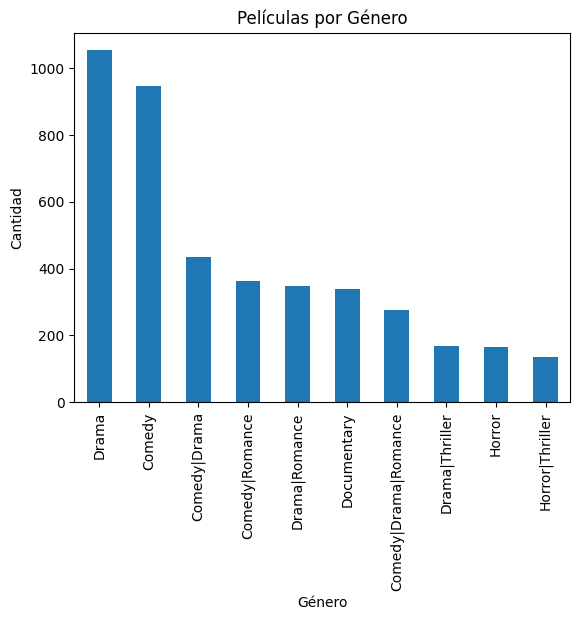

In [ ]:
import matplotlib.pyplot as plt

genre_counts.head(10).plot(kind='bar', title='Películas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


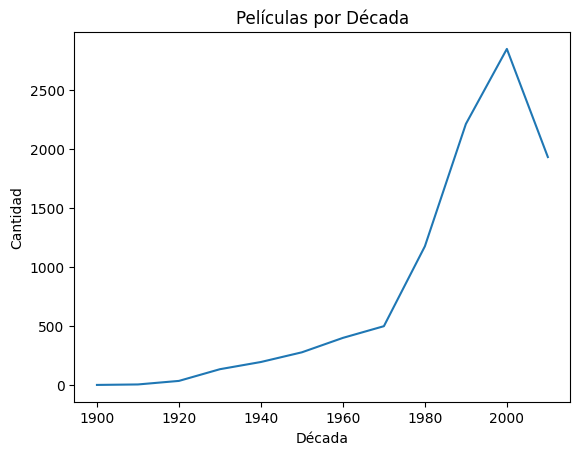

In [ ]:
movies_by_decade.plot(kind='line', title='Películas por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad')
plt.show()


In [5]:
df_action_movies.to_csv('action_movies.csv', index=False)


NameError: name 'df_action_movies' is not defined

In [4]:

 
dfdb.to_excel('movies.xlsx', index=False)


NameError: name 'dfdb' is not defined

In [3]:
import pandas as pd
import sqlite3

query = "SELECT * FROM movies WHERE genres LIKE '%Comedy%'"
df_comedy = pd.read_sql_query(query, conn)
print(df_comedy.head())


NameError: name 'conn' is not defined

In [2]:
import sqlite3
import pandas as pd

# Ruta de la base de datos
db_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/database.db"

# Establecer la conexión a la base de datos
try:
    conn = sqlite3.connect(db_path)

    # Ejecutar la consulta SQL para obtener las películas de comedia
    query = "SELECT * FROM movies WHERE genres LIKE '%Comedy%'"
    df_comedy = pd.read_sql_query(query, conn)

    # Mostrar las primeras filas del DataFrame
    print(df_comedy.head())

except Exception as e:
    print("Error al conectar a la base de datos:", e)

finally:
    conn.close()  # Cerrar la conexión a la base de datos


Error al conectar a la base de datos: unable to open database file


NameError: name 'conn' is not defined

In [9]:
import os

# Ruta relativa del archivo
archivo = "database.db"

# Obtener la ruta absoluta
ruta_absoluta = os.path.abspath(archivo)

print("Ruta absoluta del archivo:", ruta_absoluta)


Ruta absoluta del archivo: /mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/database.db


In [7]:
import pandas as pd

series1 = pd.Series(['php', 'python','java','c#'])
print(series1)


0       php
1    python
2      java
3        c#
dtype: object


In [ ]:
import pandas as pd

# Datos de ejemplo

data = {

'Producto': ['Manzana', 'Banana', 'Naranja' 'Pera'],
'Precio' : [1200, 800, 1500, 1300],
'Cantidad': [10, 5, 0, 3]

}

# Crear DataFrame

df = pd.DataFrame(data)

# Mostrar información básica

print("Información del DataFrame:")
print(df.info())

# Calcular el valor total por producto (Precio * Cantidad)

df['Valor Total'] = df['Precio'] * df['Cantidad']

# Mostrar el DataFrame con la nueva columna

print("\nDataframe con columna de valor total:")
print(df)






**Importar bibliotecas necesarias**

In [2]:
import psycopg2
from psycopg2 import Error # Importar la clase Error
from psycopg2 import sql
import pandas as pd

**Conexión con la base de datos PostgreSQL**

In [3]:
# Conexión a la base de datos
def create_database_connection():
    conn = None
    try:
        conn = psycopg2.connect(
            database="datafundamental", 
            user="datafundamental_owner", 
            password="uozci0wQGpA6", 
            host="ep-solitary-pond-a2p3evpo.eu-central-1.aws.neon.tech", 
            sslmode="require", 
            port=5432
        )
        print("Connected to 'datafundamental' successfully.")
    except psycopg2.Error as err:
        print(f"Error: {err}")
    return conn

**Obtener todas las filas de una tabla (por ejemplo, customers)**

In [15]:
import psycopg2
import pandas as pd

def fetch_data(query):
    conn = create_database_connection()
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Cargar datos de la tabla customers
query = "SELECT * FROM customers;"
df_customers = fetch_data(query)

print(df_customers.head())


Connected to 'datafundamental' successfully.
   customernumber                  customername   contactfirstname  \
0             103             Atelier graphique    Carine  Schmitt   
1             114    Australian Collectors, Co.     Peter Ferguson   
2             119             La Rochelle Gifts    Janine  Labrune   
3             121            Baane Mini Imports  Jonas  Bergulfsen   
4             124  Mini Gifts Distributors Ltd.       Susan Nelson   

          phone                       address        city     state  \
0    40.32.2555                54, rue Royale      Nantes      None   
1  03 9520 4555    636 St Kilda Road, Level 3   Melbourne  Victoria   
2    40.67.8555  67, rue des Cinquante Otages      Nantes      None   
3    07-98 9555        Erling Skakkes gate 78     Stavern      None   
4    4155551450               5677 Strong St.  San Rafael        CA   

  postalcode    country  salesrepemployeenumber  creditlimit  
0      44000     France                  137

**Verificar nombres de columnas antes de la consulta**

In [6]:
query_check_columns = """
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'sales';
"""
df_columns = fetch_data(query_check_columns)
print("Columnas disponibles en la tabla 'sales':")
print(df_columns)


Connected to 'datafundamental' successfully.
Columnas disponibles en la tabla 'sales':
        column_name
0      sales_amount
1   orderlinenumber
2         orderdate
3       shippeddate
4      requireddate
5    customernumber
6    employeenumber
7   quantityordered
8         priceeach
9       ordernumber
10      productcode
11           status
12         comments


**La consulta correcta para obtener el total de ventas agrupadas por producto sería:**

In [7]:
query = """
SELECT productcode, 
       SUM(quantityordered * priceeach) AS total_sales
FROM sales
GROUP BY productcode
ORDER BY total_sales DESC;
"""

df_sales = fetch_data(query)
print(df_sales.head())


Connected to 'datafundamental' successfully.
  productcode  total_sales
0    S18_3232    269597.28
1    S12_1108    176903.89
2    S10_1949    176128.92
3    S10_4698    157284.51
4    S12_1099    156073.94


**Listar empleados por employeenumber y la ciudad de la oficina**

In [8]:
query = """
SELECT * 
FROM employees 
WHERE employeenumber > 5000;

SELECT * 
FROM employees 
WHERE officecity = 'San Francisco';

"""
df_employees = fetch_data(query)
print(df_employees)

Connected to 'datafundamental' successfully.
   employeenumber             name extension                           email  \
0            1002     Diane Murphy     x5800    dmurphy@classicmodelcars.com   
1            1056   Mary Patterson     x4611  mpatterso@classicmodelcars.com   
2            1076    Jeff Firrelli     x9273  jfirrelli@classicmodelcars.com   
3            1143      Anthony Bow     x5428       abow@classicmodelcars.com   
4            1165  Leslie Jennings     x3291  ljennings@classicmodelcars.com   
5            1166  Leslie Thompson     x4065  lthompson@classicmodelcars.com   

   reportsto            jobtitle     officecity      officephone  \
0        NaN           President  San Francisco  +1 650 219 4782   
1     1002.0            VP Sales  San Francisco  +1 650 219 4782   
2     1002.0        VP Marketing  San Francisco  +1 650 219 4782   
3     1056.0  Sales Manager (NA)  San Francisco  +1 650 219 4782   
4     1143.0           Sales Rep  San Francisco  +1 65

**Filtrar los pagos mayores a 1000 en la tabla payments**

In [9]:
query = """
SELECT * FROM payments 
WHERE amount > 1000;
"""
df_payments = fetch_data(query)
print(df_payments)


Connected to 'datafundamental' successfully.
     customernumber checknumber paymentdate    amount
0               103    HQ336336  2004-10-19   6066.78
1               103    JM555205  2003-06-05  14571.44
2               103    OM314933  2004-12-18   1676.14
3               112    BO864823  2004-12-17  14191.12
4               112     HQ55022  2003-06-06  32641.98
..              ...         ...         ...       ...
254             495    BH167026  2003-12-26  59265.14
255             495    FN155234  2004-05-14   6276.60
256             496    EU531600  2005-05-25  30253.75
257             496    MB342426  2003-07-16  32077.44
258             496     MN89921  2004-12-31  52166.00

[259 rows x 4 columns]


**2. Ejercicios usando Pandas: loc y iloc
Una vez que tienes los datos cargados en un DataFrame, puedes aplicar los siguientes ejercicios:

a) Filtrar clientes por país usando loc**

In [10]:
# Filtrar clientes de España
df_spain = df_customers.loc[df_customers['country'] == 'Spain']
print(df_spain)


     customernumber                customername   contactfirstname  \
9               141      Euro+ Shopping Channel      Diego  Freyre   
35              216          Enaco Distributors  Eduardo  Saavedra   
40              237               ANG Resellers  Alejandra  Camino   
72              344                 CAF Imports    Jesus Fernandez   
100             458  Corrida Auto Replicas, Ltd     Martín  Sommer   
103             465         Anton Designs, Ltd.       Carmen Anton   
110             484  Iberia Gift Imports, Corp.   José Pedro  Roel   

               phone                                address       city state  \
9     (91) 555 94 44                     C/ Moralzarzal, 86     Madrid  None   
35     (93) 203 4555                 Rambla de Cataluña, 23  Barcelona  None   
40     (91) 745 6555                            Gran Vía, 1     Madrid  None   
72   +34 913 728 555  Merchants House, 27-30 Merchants Quay     Madrid  None   
100   (91) 555 22 82                   

**b) Seleccionar filas específicas por índice usando iloc**


In [11]:
# Obtener las primeras 10 filas de la tabla employees
df_first_10 = df_employees.iloc[:10]
print(df_first_10)


   employeenumber             name extension                           email  \
0            1002     Diane Murphy     x5800    dmurphy@classicmodelcars.com   
1            1056   Mary Patterson     x4611  mpatterso@classicmodelcars.com   
2            1076    Jeff Firrelli     x9273  jfirrelli@classicmodelcars.com   
3            1143      Anthony Bow     x5428       abow@classicmodelcars.com   
4            1165  Leslie Jennings     x3291  ljennings@classicmodelcars.com   
5            1166  Leslie Thompson     x4065  lthompson@classicmodelcars.com   

   reportsto            jobtitle     officecity      officephone  \
0        NaN           President  San Francisco  +1 650 219 4782   
1     1002.0            VP Sales  San Francisco  +1 650 219 4782   
2     1002.0        VP Marketing  San Francisco  +1 650 219 4782   
3     1056.0  Sales Manager (NA)  San Francisco  +1 650 219 4782   
4     1143.0           Sales Rep  San Francisco  +1 650 219 4782   
5     1143.0           Sales Re

**c) Seleccionar columnas específicas usando loc**

In [13]:
query_check_columns = """
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'customers';
"""
df_columns = fetch_data(query_check_columns)
print("Columnas disponibles en la tabla 'customers':")
print(df_columns)


Connected to 'datafundamental' successfully.
Columnas disponibles en la tabla 'customers':
               column_name
0           customernumber
1   salesrepemployeenumber
2              creditlimit
3                    phone
4                  address
5                     city
6                    state
7               postalcode
8                  country
9             customername
10        contactfirstname


**Obtener solo número de teléfono y el límite de credito de los clientes**

In [15]:
# Obtener solo número de teléfono y el límite de credito de los clientes
df_names_emails = df_customers.loc[:, ['creditlimit', 'phone']]
print(df_names_emails.head())


   creditlimit         phone
0      21000.0    40.32.2555
1     117300.0  03 9520 4555
2     118200.0    40.67.8555
3      81700.0    07-98 9555
4     210500.0    4155551450


d) Filtrar cada precio del año superior a 100 unidades con loc

In [32]:
query_check_columns = """
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'sales';
"""
df_columns = fetch_data(query_check_columns)
print("Columnas disponibles en la tabla 'sales':")
print(df_columns)

query = """
SELECT * 
FROM sales 
WHERE priceeach > 100;
"""

df_high_sales_sql = fetch_data(query)
print(df_high_sales_sql)



Connected to 'datafundamental' successfully.
Columnas disponibles en la tabla 'sales':
        column_name
0      sales_amount
1   orderlinenumber
2         orderdate
3       shippeddate
4      requireddate
5    customernumber
6    employeenumber
7   quantityordered
8         priceeach
9       ordernumber
10      productcode
11           status
12         comments
Connected to 'datafundamental' successfully.
      ordernumber  orderlinenumber   orderdate shippeddate requireddate  \
0           10100                3  2003-01-06  2003-01-10   2003-01-13   
1           10101                1  2003-01-09  2003-01-11   2003-01-18   
2           10101                4  2003-01-09  2003-01-11   2003-01-18   
3           10103                1  2003-01-29  2003-02-02   2003-02-07   
4           10103                4  2003-01-29  2003-02-02   2003-02-07   
...           ...              ...         ...         ...          ...   
1034        10425                7  2005-05-31        None   20

**e) Actualizar valores en el DataFrame usando loc**

In [38]:
# Verificar los nombres de las columnas
query_check_columns = """
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'customers';
"""
df_columns = fetch_data(query_check_columns)
print("Columnas disponibles en la tabla 'customers':")
print(df_columns)

# Verificar los valores únicos en la columna customernumber
print(df_customers['customernumber'].unique())

# Cambiar el país de los clientes con ID 150 a 'France'
df_customers.loc[df_customers['customernumber'] > 150, 'country'] = 'France'
print(df_customers[df_customers['customernumber'] > 150])


Connected to 'datafundamental' successfully.
Columnas disponibles en la tabla 'customers':
               column_name
0           customernumber
1   salesrepemployeenumber
2              creditlimit
3                    phone
4                  address
5                     city
6                    state
7               postalcode
8                  country
9             customername
10        contactfirstname
[103 114 119 121 124 125 128 129 131 141 144 145 146 151 157 161 166 167
 168 169 171 172 173 175 181 186 187 189 198 201 202 204 205 206 209 216
 219 223 227 233 237 239 240 242 247 249 250 256 259 260 273 276 278 282
 286 293 298 299 303 307 311 314 319 320 321 323 324 328 333 334 335 339
 344 347 348 350 353 356 357 361 362 363 369 376 379 381 382 386 406 409
 412 415 424 443 447 448 450 452 455 456 458 459 462 465 471 473 475 477
 480 481 484 486 487 489 495 496 112]
     customernumber                    customername contactfirstname  \
13              151              Musc

**f) Seleccionar filas impares usando iloc**

In [40]:
query = "SELECT * FROM products;"
df_products = fetch_data(query)

# Mostrar las columnas disponibles para verificar la carga
print(df_products.columns)

# Seleccionar solo filas impares del DataFrame de productos
df_odd_rows = df_products.iloc[1::2]
print(df_odd_rows)


Connected to 'datafundamental' successfully.
Index(['productcode', 'productname', 'productline', 'linetextdescription',
       'linehtmldescription', 'lineimage'],
      dtype='object')
    productcode                                  productname  \
1      S10_1949                     1952 Alpine Renault 1300   
3      S10_4698         2003 Harley-Davidson Eagle Drag Bike   
5      S10_4962                       1962 LanciaA Delta 16V   
7      S12_1108                            2001 Ferrari Enzo   
9      S12_2823                             2002 Suzuki XREO   
11     S12_3380                           1968 Dodge Charger   
13     S12_3990                      1970 Plymouth Hemi Cuda   
15     S12_4675                           1969 Dodge Charger   
17     S18_1129                              1993 Mazda RX-7   
19     S18_1367     1936 Mercedes-Benz 500K Special Roadster   
21     S18_1662                  1980s Black Hawk Helicopter   
23     S18_1889                  1948 Porsche 

g) Ordenar los productos por código descendente y seleccionar los primeros 5

In [43]:
# Cargar el Dataframe de una consulta SQL
query = "SELECT * FROM sales;"
df_sales = fetch_data(query)

# Mostrar las columnas disponibles para verificar la carga
print(df_sales.columns)

df_describe_sales = df_sales.sort_values(by='productcode', ascending=False).iloc[:5]
print(df_describe_sales)



Connected to 'datafundamental' successfully.
Index(['productcode', 'productname', 'productline', 'linetextdescription',
       'linehtmldescription', 'lineimage'],
      dtype='object')
    productcode                productname productline  \
109    S72_3212                 Pont Yacht       Ships   
108    S72_1253           Boeing X-32A JSF      Planes   
107   S700_4002  American Airlines: MD-11S      Planes   
106   S700_3962             The Queen Mary       Ships   
105   S700_3505                The Titanic       Ships   

                                   linetextdescription linehtmldescription  \
109  The perfect holiday or anniversary gift for ex...                None   
108  Unique, diecast airplane and helicopter replic...                None   
107  Unique, diecast airplane and helicopter replic...                None   
106  The perfect holiday or anniversary gift for ex...                None   
105  The perfect holiday or anniversary gift for ex...                None 

h) Calcular estadísticas descriptivas de las ventas

In [47]:
# Cargar el Dataframe de una consulta SQL
query = "SELECT * FROM sales;"
df_sales = fetch_data(query)

# Mostrar las columnas disponibles para verificar la carga
print(df_sales.columns)

# Calcular estadísticas básicas
print(df_sales[['employeenumber', 'orderdate']].describe())


Connected to 'datafundamental' successfully.
Index(['ordernumber', 'orderlinenumber', 'orderdate', 'shippeddate',
       'requireddate', 'customernumber', 'employeenumber', 'productcode',
       'status', 'comments', 'quantityordered', 'priceeach', 'sales_amount'],
      dtype='object')
       employeenumber
count     2859.000000
mean      1380.933193
std        156.604464
min       1165.000000
25%       1216.000000
50%       1370.000000
75%       1501.000000
max       1702.000000


**i) Filtrar clientes cuyo nombre comience con "A"
j) Combinar los DataFrames de productos y ventas con un merge**

In [16]:
# Cargar el Dataframe de una consulta SQL
query = "SELECT * FROM customers;"
df_customers = fetch_data(query)

query = "SELECT * FROM products;"
df_products = fetch_data(query)

query = "SELECT * FROM sales;"
df_sales = fetch_data(query)

# Mostrar las columnas disponibles para verificar la carga
print(df_customers.columns)
print(df_products.columns)
print(df_sales.columns)

df_customers_a = df_customers.loc[df_customers['city'].str.startswith('A')]
print(df_customers_a)

df_merged = pd.merge(df_sales, df_products, on='productcode', how='inner')
print(df_merged.head())


Connected to 'datafundamental' successfully.
Connected to 'datafundamental' successfully.
Connected to 'datafundamental' successfully.
Index(['customernumber', 'customername', 'contactfirstname', 'phone',
       'address', 'city', 'state', 'postalcode', 'country',
       'salesrepemployeenumber', 'creditlimit'],
      dtype='object')
Index(['productcode', 'productname', 'productline', 'linetextdescription',
       'linehtmldescription', 'lineimage'],
      dtype='object')
Index(['ordernumber', 'orderlinenumber', 'orderdate', 'shippeddate',
       'requireddate', 'customernumber', 'employeenumber', 'productcode',
       'status', 'comments', 'quantityordered', 'priceeach', 'sales_amount'],
      dtype='object')
     customernumber                customername  contactfirstname  \
14              157       Diecast Classics Inc.      Kelvin Leong   
58              303            Schuyler Imports  Bradley Schuyler   
65              323  Down Under Souveniers, Inc       Mike Graham   
78  

Ejercicios Pandas DataFrames 02

El dataset de vuelos "flights14.csv" y tiene todas estas columnas ,"year","month","day","dep_delay","arr_delay","carrier","origin","dest","air_time","distance","hour"

 
escribe un programa Pandas para dividir los datos basados en origen u destino. Muestra cada grupo y el número de elementos por grupo
 
Escribe un programa Pandas para calcula la media, desviación estándar, min y max del retraso total de cada orgige-destino.
 
Escribe un programa Pandas para dividir un conjunto de datos y agruparlos por dos columnas, y luego ordenar los resultados agregados dentro de los grupos.
En el siguiente conjunto de datos de vuelos, agrupar "date" (fecha completa) y "carrier". Luego ordenar la suma de 'total_delay' dentro de los grupos. tiene todas estas columnas ,"year","month","day","dep_delay","arr_delay","carrier","origin","dest","air_time","distance","hour"

 
Escribe un programa Pandas para contar el múmero de retrasos de salida por mes y origen.
 
Escribe un programa Pandas para cargar los datos de productos y ventas del archivo FoodMarket.xlsx y mézclalos en un solo dataframe.
 
Escribe un programa Pandas para extraer información sobre el número de compras totales y el monto total por nombre de producto y año.


In [5]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('flights14.csv')

# Agrupar por origen y destino y contar el número de elementos
grouped = df.groupby(['origin', 'dest']).size().reset_index(name='counts')
print(grouped)


    origin dest  counts
0      EWR  ALB     169
1      EWR  ANC      13
2      EWR  ATL    4182
3      EWR  AUS     568
4      EWR  AVL     145
..     ...  ...     ...
216    LGA  SYR     332
217    LGA  TPA    1852
218    LGA  TVC      36
219    LGA  TYS     167
220    LGA  XNA     441

[221 rows x 3 columns]


In [6]:
# Calcular el retraso total
df['total_delay'] = df['dep_delay'] + df['arr_delay']

# Agrupar por origen y destino y calcular estadísticas
stats = df.groupby(['origin', 'dest'])['total_delay'].agg(['mean', 'std', 'min', 'max']).reset_index()
print(stats)


    origin dest       mean         std  min   max
0      EWR  ALB  35.230769   92.478247  -36   618
1      EWR  ANC  15.307692   43.453777  -30   121
2      EWR  ATL  32.235533  114.946191  -47  2177
3      EWR  AUS   5.871479   63.006811  -62   539
4      EWR  AVL  24.903448   82.071727  -33   625
..     ...  ...        ...         ...  ...   ...
216    LGA  SYR  23.346386   88.091602  -54   844
217    LGA  TPA  15.267279   80.570698  -57   964
218    LGA  TVC  71.500000  183.741200  -41   765
219    LGA  TYS  17.305389   57.004937  -44   291
220    LGA  XNA   6.911565   53.977890  -64   320

[221 rows x 6 columns]


In [7]:
# Agrupar por origen y destino y ordenar por el retraso total dentro de cada grupo
sorted_group = df.groupby(['origin', 'dest']).apply(lambda x: x.sort_values(by='total_delay', ascending=False)).reset_index(drop=True)
print(sorted_group)


        Unnamed: 0  year  month  day  dep_delay  arr_delay carrier origin  \
0           123600  2014      6    3        310        308      EV    EWR   
1             2178  2014      1    4        220        211      EV    EWR   
2            10241  2014      1   15        151        158      EV    EWR   
3            84933  2014      4   18        153        153      EV    EWR   
4            72153  2014      4    3        144        160      EV    EWR   
...            ...   ...    ...  ...        ...        ...     ...    ...   
253311      222282  2014      9   24        -10        -40      MQ    LGA   
253312      197346  2014      8   26        -12        -43      MQ    LGA   
253313      204502  2014      9    3        -12        -48      MQ    LGA   
253314      206193  2014      9    5        -12        -49      MQ    LGA   
253315      198280  2014      8   27        -14        -50      MQ    LGA   

       dest  air_time  distance  hour  total_delay  
0       ALB        36 

In [8]:
# Crear columna de fecha completa
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Agrupar por fecha y aerolínea y sumar retrasos
grouped_date_carrier = df.groupby(['date', 'carrier'])['total_delay'].sum().reset_index()

# Ordenar por suma de retraso total dentro de los grupos
sorted_group = grouped_date_carrier.sort_values(by='total_delay', ascending=False)
print(sorted_group)


           date carrier  total_delay
41   2014-01-04      B6        44745
54   2014-01-05      B6        40968
55   2014-01-05      DL        35392
29   2014-01-03      DL        30180
35   2014-01-03      UA        29968
...         ...     ...          ...
3196 2014-09-03      B6        -2581
1924 2014-05-31      UA        -2625
1405 2014-04-21      DL        -2641
3910 2014-10-29      UA        -2670
3882 2014-10-27      B6        -2676

[3938 rows x 3 columns]


In [9]:
# Agrupar por mes y origen y contar retrasos de salida
delay_counts = df[df['dep_delay'] > 0].groupby(['month', 'origin']).size().reset_index(name='count')
print(delay_counts)


    month origin  count
0       1    EWR   4594
1       1    JFK   3670
2       1    LGA   3261
3       2    EWR   3823
4       2    JFK   3164
5       2    LGA   2590
6       3    EWR   3984
7       3    JFK   2722
8       3    LGA   2851
9       4    EWR   3927
10      4    JFK   2436
11      4    LGA   2671
12      5    EWR   3745
13      5    JFK   3020
14      5    LGA   3102
15      6    EWR   4788
16      6    JFK   3042
17      6    LGA   3375
18      7    EWR   4617
19      7    JFK   3781
20      7    LGA   3192
21      8    EWR   4234
22      8    JFK   3315
23      8    LGA   3046
24      9    EWR   2983
25      9    JFK   2204
26      9    LGA   2160
27     10    EWR   3325
28     10    JFK   2749
29     10    LGA   3058


In [10]:
# Cargar archivos Excel
df_products = pd.read_excel('FoodMarket.xlsx', sheet_name='Products')
df_sales = pd.read_excel('FoodMarket.xlsx', sheet_name='Sales')

# Unir ambos dataframes
df_merged = pd.merge(df_products, df_sales, on='product_id')
print(df_merged)


ValueError: Worksheet named 'Sales' not found

**Determinar la calidad de los datos**

In [ ]:
import pandas as pd

# Cargar el archivo
file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/housing.csv"
df = pd.read_csv(file_path)

# Evaluación de calidad de datos

# 1. Completitud (Valores faltantes)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# 2. Duplicados
duplicate_rows = df[df.duplicated()]

# 3. Outliers usando IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos en cada columna numérica
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# 4. Resumen de calidad
quality_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing %": missing_percentage,
    "Outliers": outliers,
    "Duplicate Rows": len(duplicate_rows)
})

# Mostrar los resultados
import ace_tools as tools
tools.display_dataframe_to_user(name="Reporte de Calidad de Datos", dataframe=quality_report)



In [10]:
import os

# Ruta relativa del archivo
file_path = "Users/aurelio.sosa.netmind/Pandas/housing.csv"

# Obtener la ruta absoluta
absolute_path = os.path.abspath(file_path)

# Imprimir la ruta absoluta
print("Ruta absoluta del archivo:", absolute_path)

Ruta absoluta del archivo: /mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/housing.csv


In [13]:
import pandas as pd
import os

# Ruta del archivo en Azure
file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/housing.csv"

# Verificar si el archivo existe
if os.path.exists(file_path):
    # Cargar el dataset
    df = pd.read_csv(file_path)

    # 1. Completitud (Valores faltantes)
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # 2. Duplicados
    duplicate_rows = df[df.duplicated()]

    # 3. Outliers usando IQR (Rango intercuartil)
    Q1 = df.quantile(0.25, numeric_only=True)
    Q3 = df.quantile(0.75, numeric_only=True)
    IQR = Q3 - Q1

    # Identificar valores atípicos en cada columna numérica
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

    # 4. Resumen de calidad
    quality_report = pd.DataFrame({
        "Missing Values": missing_values,
        "Missing %": missing_percentage,
        "Outliers": outliers,
        "Duplicate Rows": len(duplicate_rows)
    })

    # Mostrar el reporte
    print("🔍 Reporte de Calidad de los Datos:")
    print(quality_report)
else:
    print(f"❌ El archivo no se encuentra en la ruta: {file_path}")


❌ El archivo no se encuentra en la ruta: /mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/housing.csv


In [5]:
import os

# Ruta del directorio donde debería estar el archivo
directory_path = r"/mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/"

# Listar archivos en el directorio
if os.path.exists(directory_path):
    print("Archivos en el directorio:")
    print(os.listdir(directory_path))
else:
    print(f"❌ La ruta no existe: {directory_path}")


❌ La ruta no existe: /mnt/batch/tasks/shared/LS_root/mounts/clusters/aurelio-parra/code/Users/aurelio.sosa.netmind/Pandas/Users/aurelio.sosa.netmind/Pandas/


In [1]:
import pandas as pd
import numpy as np

# Crear un DataFrame con valores nulos
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [None, 5, 6, 7]
})

# Ver valores nulos
print(df.isnull())  # Muestra True en valores nulos
print(df.isnull().sum())  # Cuenta los nulos por columna


       A      B
0  False   True
1  False  False
2   True  False
3  False  False
A    1
B    1
dtype: int64


In [2]:
df_cleaned = df.dropna()  # Elimina filas con valores nulos
print(df_cleaned)


     A    B
1  2.0  5.0
3  4.0  7.0


In [3]:
df_filled = df.fillna(0)  # Reemplaza nulos con 0
df_filled = df.fillna(df.mean())  # Rellena con el promedio de cada columna
print(df_filled)


          A    B
0  1.000000  6.0
1  2.000000  5.0
2  2.333333  6.0
3  4.000000  7.0


In [4]:
df = pd.DataFrame({
    'Edad': [25, -3, 150, 30, 28],  # Edad negativa o fuera de rango
    'Género': ['M', 'F', 'Otro', 'Desconocido', 'Mujer']  # Valores mal categorizados
})

# Detectar valores fuera de rango en Edad
df['Edad_invalida'] = (df['Edad'] < 0) | (df['Edad'] > 120)
print(df[df['Edad_invalida']])

# Ver categorías únicas en Género
print(df['Género'].unique())


   Edad Género  Edad_invalida
1    -3      F           True
2   150   Otro           True
['M' 'F' 'Otro' 'Desconocido' 'Mujer']


In [5]:
# Reemplazar valores erróneos en Género
df['Género'] = df['Género'].replace({'Mujer': 'F', 'Desconocido': 'Otro'})
print(df)

# Ajustar edades incorrectas
df['Edad'] = df['Edad'].apply(lambda x: np.nan if x < 0 or x > 120 else x)


   Edad Género  Edad_invalida
0    25      M          False
1    -3      F           True
2   150   Otro           True
3    30   Otro          False
4    28      F          False


In [6]:
df = pd.DataFrame({
    'ID': [1, 2, 2, 3, 4, 4],
    'Nombre': ['Ana', 'Luis', 'Luis', 'Carlos', 'Laura', 'Laura']
})

# Detectar duplicados
print(df.duplicated())  # Devuelve True en filas duplicadas


0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool


In [7]:
df = df.drop_duplicates()  # Elimina duplicados
print(df)


   ID  Nombre
0   1     Ana
1   2    Luis
3   3  Carlos
4   4   Laura


In [8]:
df = pd.DataFrame({
    'Fecha': ['2024-02-01', '02/03/2024', 'Enero 5, 2024'],  # Formatos inconsistentes
    'Precio': ['100.5', '200$', '300']  # Valores con caracteres incorrectos
})

# Convertir fecha a formato estándar
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Convertir precios a número (eliminando caracteres no numéricos)
df['Precio'] = df['Precio'].replace('[^\d.]', '', regex=True).astype(float)
print(df)


       Fecha  Precio
0 2024-02-01   100.5
1 2024-02-03   200.0
2        NaT   300.0


In [1]:
import pandas as pd
import numpy as np

# Crear un DataFrame con diferentes tipos de datos
df = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Edad': [25, np.nan, 30, 40, 22],
    'Salario': [50000, 60000, np.nan, 70000, 55000],
    'Género': ['M', 'F', 'M', 'F', 'M'],
    'Fecha': pd.to_datetime(['2024-01-01', '2024-02-15', '2024-03-10', np.nan, '2024-04-05'])
})

# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include=['number'])
print(df_numericas)

# Seleccionar solo columnas de tipo objeto (categóricas)
df_categoricas = df.select_dtypes(include=['object'])
print(df_categoricas)


   ID  Edad  Salario
0   1  25.0  50000.0
1   2   NaN  60000.0
2   3  30.0      NaN
3   4  40.0  70000.0
4   5  22.0  55000.0
  Género
0      M
1      F
2      M
3      F
4      M


In [2]:
# Ver valores únicos en la columna 'Género'
print(df['Género'].unique())

# Contar cuántos valores únicos tiene la columna 'Género'
print(df['Género'].nunique())


['M' 'F']
2


In [3]:
df['Género'] = df['Género'].replace({'Masculino': 'M', 'Femenino': 'F', 'm': 'M', 'f': 'F'})


In [4]:
# Resumen estadístico de las columnas numéricas
print(df.describe())

# Ver la frecuencia de cada valor en 'Género'
print(df['Género'].value_counts())


             ID       Edad       Salario
count  5.000000   4.000000      4.000000
mean   3.000000  29.250000  58750.000000
std    1.581139   7.889867   8539.125638
min    1.000000  22.000000  50000.000000
25%    2.000000  24.250000  53750.000000
50%    3.000000  27.500000  57500.000000
75%    4.000000  32.500000  62500.000000
max    5.000000  40.000000  70000.000000
M    3
F    2
Name: Género, dtype: int64


In [5]:
df.loc[(df['Edad'] < 0) | (df['Edad'] > 120), 'Edad'] = np.nan


In [6]:
df['Edad'].fillna(df['Edad'].mean(), inplace=True)
df['Salario'].fillna(df['Salario'].median(), inplace=True)


In [7]:
df = df.dropna(subset=['Fecha'])


In [8]:
df['Salario'] = df['Salario'].astype(float)


In [9]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')


   Edad  Salario Género  Compras
0  25.0  30000.0      M        2
1  30.0  40000.0      F        4
2  35.0  50000.0      M        5
3  40.0  60000.0      F        6
4   NaN  55000.0      F        5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Edad     9 non-null      float64
 1   Salario  9 non-null      float64
 2   Género   10 non-null     object 
 3   Compras  10 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes
None
Edad       1
Salario    1
Género     0
Compras    0
dtype: int64


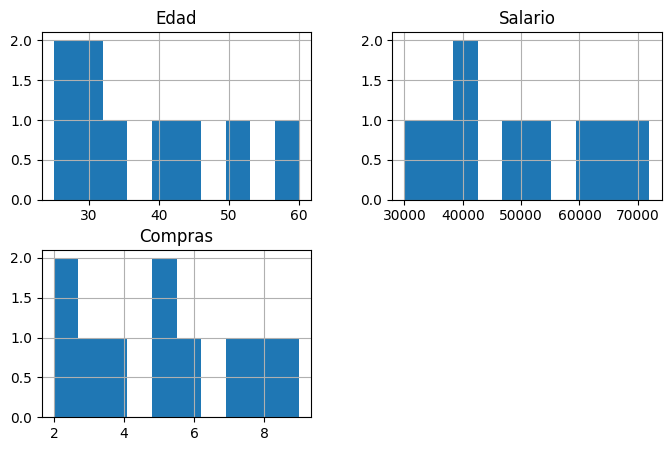

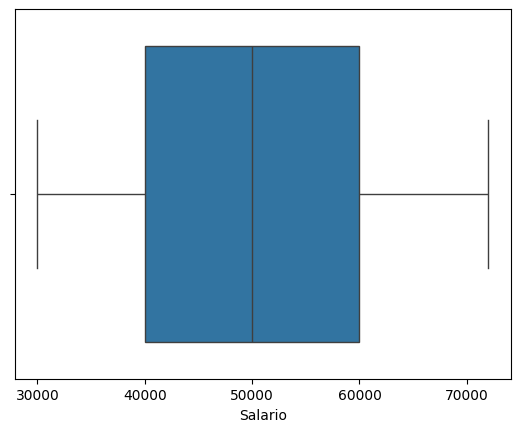

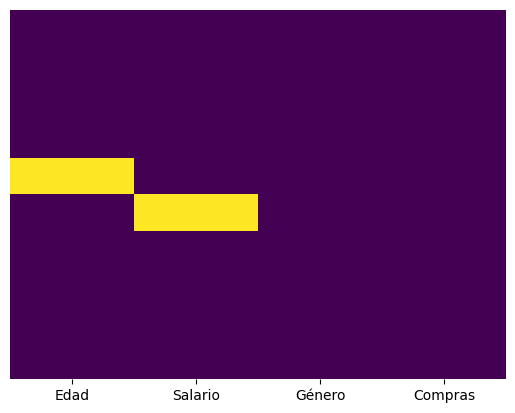

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un dataset de ejemplo
df = pd.DataFrame({
    'Edad': [25, 30, 35, 40, np.nan, 50, 60, 30, 27, 45],
    'Salario': [30000, 40000, 50000, 60000, 55000, np.nan, 65000, 40000, 37000, 72000],
    'Género': ['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Compras': [2, 4, 5, 6, 5, 7, 8, 3, 2, 9]
})

# Mostrar las primeras filas
print(df.head())

# Información general de las columnas
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

# Distribución de datos numéricos
df.hist(figsize=(8, 5))
plt.show()

# Boxplot para detectar valores atípicos en "Salario"
sns.boxplot(x=df['Salario'])
plt.show()

# Mapa de calor de valores nulos
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()


In [11]:
# Estadísticas descriptivas generales
print(df.describe())


            Edad       Salario    Compras
count   9.000000      9.000000  10.000000
mean   38.000000  49888.888889   5.100000
std    11.768602  14154.897072   2.424413
min    25.000000  30000.000000   2.000000
25%    30.000000  40000.000000   3.250000
50%    35.000000  50000.000000   5.000000
75%    45.000000  60000.000000   6.750000
max    60.000000  72000.000000   9.000000


In [12]:
# Contar valores únicos en una columna categórica
print(df['Género'].value_counts())


M    5
F    5
Name: Género, dtype: int64


In [13]:
# Calcular IQR para la variable Salario
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores dentro del rango aceptable
df_sin_outliers = df[(df['Salario'] >= limite_inferior) & (df['Salario'] <= limite_superior)]

print(df_sin_outliers)


   Edad  Salario Género  Compras
0  25.0  30000.0      M        2
1  30.0  40000.0      F        4
2  35.0  50000.0      M        5
3  40.0  60000.0      F        6
4   NaN  55000.0      F        5
6  60.0  65000.0      F        8
7  30.0  40000.0      M        3
8  27.0  37000.0      F        2
9  45.0  72000.0      M        9


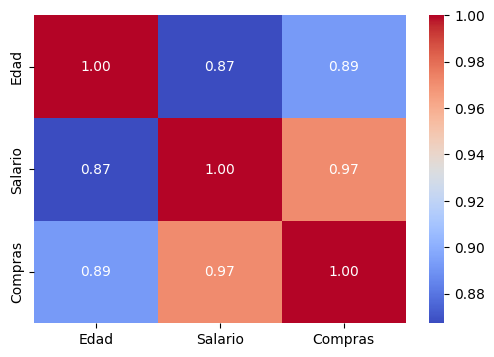

In [14]:
# Matriz de correlación
corr_matrix = df.corr()

# Visualización con heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Edad     8 non-null      int64  
 1   Salario  8 non-null      float64
 2   Género   8 non-null      object 
 3   Compras  8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 320.0+ bytes


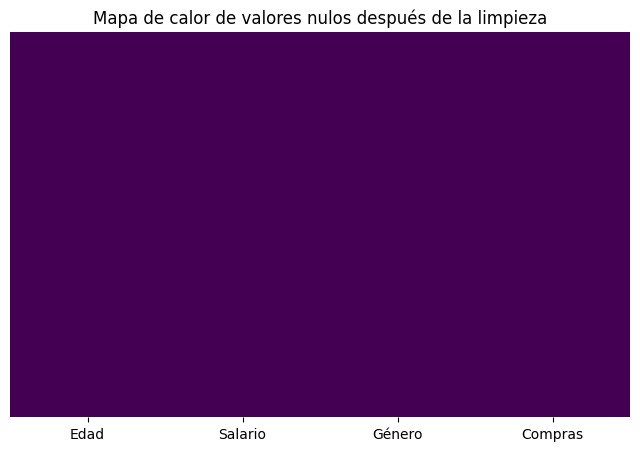

📌 Datos limpios después de la limpieza:
   Edad  Salario Género  Compras
0    25  30000.0      M        2
1    30  40000.0      F        4
2    35  50000.0      M        5
3    40  60000.0      F        6
4    30  55000.0      F        5
5    50  50000.0      M        7
7    30  40000.0      M        3
8    27  37000.0      F        2

📊 Resumen estadístico de los datos limpios:
           Edad       Salario   Compras
count   8.00000      8.000000  8.000000
mean   33.37500  45250.000000  4.250000
std     8.17553  10095.968078  1.832251
min    25.00000  30000.000000  2.000000
25%    29.25000  39250.000000  2.750000
50%    30.00000  45000.000000  4.500000
75%    36.25000  51250.000000  5.250000
max    50.00000  60000.000000  7.000000

🔍 Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Edad     8 non-null     

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un dataset de ejemplo con valores inconsistentes, nulos y outliers
df = pd.DataFrame({
    'Edad': [25, 30, 35, 40, np.nan, 50, 150, 30, 27, -5],
    'Salario': [30000, 40000, 50000, 60000, 55000, np.nan, 100000, 40000, 37000, 72000],
    'Género': ['M', 'F', 'M', 'F', 'F', 'M', 'Otro', 'm', 'f', 'M'],
    'Compras': [2, 4, 5, 6, 5, 7, 30, 3, 2, 9]
})

# 1️⃣ Manejo de valores nulos
df['Edad'].fillna(df['Edad'].median(), inplace=True)  # Rellenar con la mediana
df['Salario'].fillna(df['Salario'].median(), inplace=True)  # Rellenar con la mediana

# 2️⃣ Estandarización de datos categóricos
df['Género'] = df['Género'].replace({'m': 'M', 'f': 'F', 'Otro': 'O'})

# 3️⃣ Eliminación de valores atípicos (Edad y Compras) usando Rango Intercuartil (IQR)
for col in ['Edad', 'Salario', 'Compras']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

# 4️⃣ Conversión de tipos de datos (si fuera necesario)
df['Edad'] = df['Edad'].astype(int)  # Convertir Edad a entero

# 5️⃣ Verificación final de la limpieza
cleaned_summary = df.describe()
cleaned_info = df.info()
cleaned_nulls = df.isnull().sum()
cleaned_values = df.nunique()

# Visualización final después de la limpieza
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos después de la limpieza")
plt.show()

# Mostrar los datos limpios después del proceso de limpieza
print("📌 Datos limpios después de la limpieza:")
print(df)

# Resumen estadístico de los datos limpios
print("\n📊 Resumen estadístico de los datos limpios:")
print(df.describe())

# Información general del DataFrame después de la limpieza
print("\n🔍 Información del DataFrame después de la limpieza:")
print(df.info())

# Mostrar valores únicos por columna
print("\n🔹 Valores únicos en cada columna:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")



In [ ]:
# 📌 Análisis de Correlaciones
# Matriz de correlación
corr_matrix = df.corr()

# Visualización con heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# 📌 Análisis de Clustering (Agrupación de Datos)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar solo variables numéricas para clustering
df_clustering = df[['Edad', 'Salario', 'Compras']]

# Estandarizar los datos para evitar que una variable domine sobre las demás
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualización de Clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Edad'], y=df['Salario'], hue=df['Cluster'], palette='coolwarm', s=100)
plt.title("Clusters basados en Edad y Salario")
plt.xlabel("Edad")
plt.ylabel("Salario")
plt.legend(title="Cluster")
plt.show()

# Mostrar datos con cluster asignado
df.head()
